# Metaheuristics libraries in Python

* [scikit-opt](https://scikit-opt.github.io/scikit-opt/#/en/README)
* [Distributed Evolutionary Algorithms in Python - DEAP](https://deap.readthedocs.io/en/master/)
* [OR-Tools](https://developers.google.com/optimization)
* [Python Genetic Algorithms & Differential Evolution (PyGAD](https://pygad.readthedocs.io/en/latest/)
* [MEALPY](https://mealpy.readthedocs.io/en/latest/)
* [SimAnneal](https://github.com/perrygeo/simanneal)
* [NSGA-II: Non-dominated Sorting Genetic Algorithm in Pymoo](https://pymoo.org/algorithms/moo/nsga2.html)
* [PySWARM](https://pyswarms.readthedocs.io/en/latest/)
* [swarmlib](https://pypi.org/project/swarmlib/)
* [HIVE](https://rwuilbercq.github.io/Hive/)
* [ACO-Pants](https://pypi.org/project/ACO-Pants/)

# Function Optimization

## scikit-opt example

In [1]:
# !pip install scikit-opt

best_x: [  39.26990598 -103.67255778] best_y -0.9999999999975886


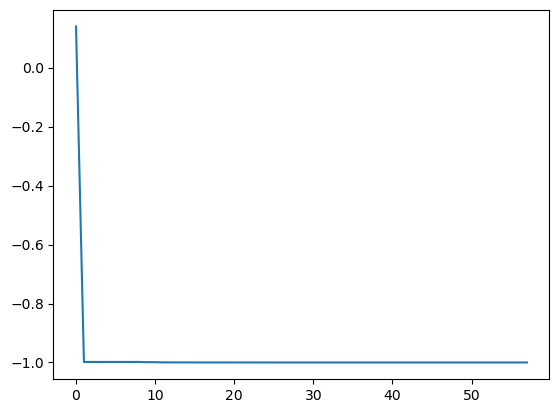

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sko.SA import SA

# define a multimodal function
obj_func = lambda x: np.sin(x[0]) * np.cos(x[1])

# solve using SA
sa = SA(func=obj_func, x0=np.array([-3, -3]), T_max=1, T_min=1e-9, L=300, max_stay_counter=150)
best_x, best_y = sa.run()
print('best_x:', best_x, 'best_y', best_y)

# print the result
plt.plot(pd.DataFrame(sa.best_y_history).cummin(axis=0))
plt.show()

## pyswarm example

In [3]:
# !pip install --upgrade pyswarm

In [4]:
from pyswarms.single.global_best import GlobalBestPSO
import math

# Eggholder optimzation function
def eggholder_func(x):
    a=np.sqrt(np.fabs(x[:, 1]+x[:, 0]/2+47))
    b=np.sqrt(np.fabs(x[:, 0]-(x[:, 1]+47)))
    c=-(x[:, 1]+47)*np.sin(a)-x[:, 0]*np.sin(b)
    return c

options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=10, dimensions=2, options=options)

In [5]:
cost, pos = optimizer.optimize(eggholder_func, 1000)
print(cost, pos)

2023-01-16 20:06:54,736 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|████████████████████████████████████████████████|1000/1000, best_cost=-66.8
2023-01-16 20:06:56,815 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -66.84371732946403, best pos: [ 8.45693443 15.65091811]


-66.84371732946403 [ 8.45693443 15.65091811]


# Travelling Salesman Problem (TSP)

In [6]:
# Define the TSP problem
city_names = ["1", "2", "3", "4", "5"]
distances = np.array([[0, 4, 2, 9, 12],
                      [4, 0, 7, 5, 5],
                      [2, 7, 0, 4, 10],
                      [9, 5, 4, 0, 3],
                      [12, 5, 10, 3, 0]])

## Solving TSP using scikit-opt

In [7]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sko.PSO import PSO_TSP

num_points = len(city_names)
points_coordinate = city_names
distance_matrix = distances

# The objective function. input routine, return total distance.
def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

# solving the problem using PSO
pso_tsp = PSO_TSP(func=cal_total_distance, n_dim=num_points, size_pop=200, max_iter=800, w=0.8, c1=0.1, c2=0.1)
best_points, best_distance = pso_tsp.run()
best_points_ = np.concatenate([best_points, [best_points[0]]])

print('best_distance', best_distance)
print('route', best_points_)

best_distance [18.]
route [2 0 3 1 4 2]


## Solving TSP using deap

In [8]:
# !pip install deap

In [9]:
from deap import base, creator, tools, algorithms
import random
import numpy as np

# Create a fitness function that minimizes the total distance
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Create the genetic operator functions
toolbox = base.Toolbox()
toolbox.register("permutation", random.sample, range(len(city_names)), len(city_names))
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.permutation)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def eval_tsp(individual):
    total_distance = 0
    for i in range(len(individual)):
        city_1 = individual[i]
        city_2 = individual[(i + 1) % len(individual)]
        total_distance += distances[city_1][city_2]
    return total_distance,

toolbox.register("evaluate", eval_tsp)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run the genetic algorithm
pop = toolbox.population(n=50)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, 
                               stats=stats, halloffame=hof, verbose=True)

# Print the final solution
best_individual = hof[0]
print("Best solution:")
print("  - Fitness: ", eval_tsp(best_individual))
print("  - Route: ", [city_names[i] for i in best_individual])

gen	nevals	avg  	min	max
0  	50    	32.28	18 	43 
1  	21    	27.18	18 	35 
2  	21    	23   	18 	35 
3  	36    	21.04	18 	33 
4  	30    	19.16	18 	37 
5  	29    	19.14	18 	32 
6  	33    	19.5 	18 	37 
7  	29    	19.32	18 	37 
8  	28    	18.66	18 	33 
9  	35    	19.2 	18 	32 
10 	37    	19.62	18 	37 
11 	24    	18.5 	18 	33 
12 	31    	18.82	18 	37 
13 	31    	18.74	18 	33 
14 	26    	18.2 	18 	28 
15 	25    	18.4 	18 	32 
16 	29    	18.16	18 	26 
17 	24    	18.12	18 	24 
18 	25    	19.16	18 	37 
19 	31    	18.24	18 	30 
20 	23    	18.56	18 	32 
21 	23    	18   	18 	18 
22 	33    	19.36	18 	32 
23 	34    	18.4 	18 	32 
24 	26    	18.52	18 	28 
25 	17    	18   	18 	18 
26 	40    	18.24	18 	24 
27 	29    	18.96	18 	30 
28 	29    	18.44	18 	30 
29 	32    	18   	18 	18 
30 	27    	18.88	18 	32 
31 	36    	18.12	18 	24 
32 	27    	18   	18 	18 
33 	33    	19.28	18 	32 
34 	30    	18.68	18 	32 
35 	29    	18.12	18 	24 
36 	23    	18.68	18 	32 
37 	39    	18.4 	18 	26 
38 	25    	18.56	18 	32 


## Solving TSP using OR-Tools

In [10]:
#!pip install --upgrade --user ortools

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from ortools.constraint_solver import pywrapcp
from ortools.constraint_solver import routing_enums_pb2

In [ ]:
# define problem data
data = {}
data['distance_matrix'] = distances
data['num_vehicles'] = 1
data['depot'] = 0

# define the solver
manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']), data['num_vehicles'], data['depot'])
routing = pywrapcp.RoutingModel(manager)

def distance_callback(from_index, to_index):
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data['distance_matrix'][from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)   

routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.local_search_metaheuristic = (
    routing_enums_pb2.LocalSearchMetaheuristic.TABU_SEARCH) # GREEDY_DESCENT, SIMULATED_ANNEALING, TABU_SEARCH, GENERIC_TABU_SEARCH
search_parameters.time_limit.seconds = 30
search_parameters.log_search = True

# print the solution
def print_solution(manager, routing, solution):
    print('Objective: {} meters'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Route for vehicle 0:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Route distance: {}meters\n'.format(route_distance)

solution = routing.SolveWithParameters(search_parameters)
if solution:
    print_solution(manager, routing, solution)